### RandomForest 

##### Random forest is based on : Decision Tree. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salary.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
X = dataset.iloc[:,1:2].values    # independent value (Level of Position)
y = dataset.iloc[:, 2].values    # dependent value (Salary)

##### We are not splitting dataset , bcoz it is small otherwise do.

In [24]:
# fit the dataset 

from sklearn.ensemble import RandomForestRegressor        # RandomForestClassifier

regressor = RandomForestRegressor(n_estimators=100, random_state=0) # n_estimator: how many Decision Tree you want, increase acc
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
# Now predict the value  and  you can compare with the datastet predicted value

y_pred = regressor.predict(X)       # y_pred = regressor.predict(6.5) , we can predict for any particular value
y_pred

array([ 47850.,  50200.,  58300.,  78100., 107100., 142600., 189400.,
       286000., 495000., 777000.])

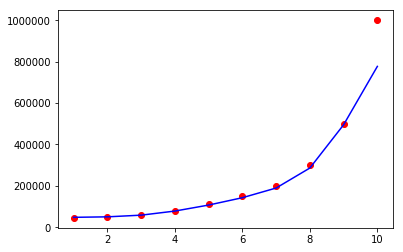

In [26]:
plt.scatter(X,y,color='red')                                      # Plotting Graph
plt.plot(X,y_pred, color='blue')
plt.show()

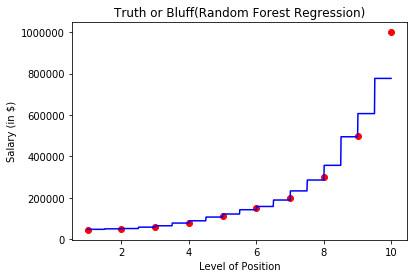

In [28]:
# Visualizing the Random Forest Regression results ( higher Resolution )

X_grid = np.arange(min(X), max(X), 0.01)    # min(X)=1 , max(X)=10  and divided the data with 0.01
X_grid = X_grid.reshape(len(X_grid), 1)   # then we reshape it.
plt.scatter(X,y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title("Truth or Bluff(Random Forest Regression)")
plt.xlabel('Level of Position')
plt.ylabel('Salary (in $)')                                # Now you see its better, these steps shown are mean of Decision Tree
plt.show()

## ------------------------------------------------------------------------

## Case 2

In [4]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()

In [5]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

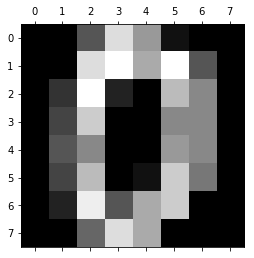

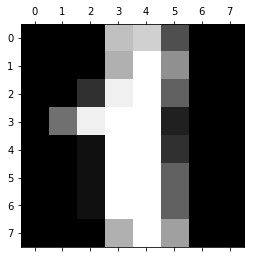

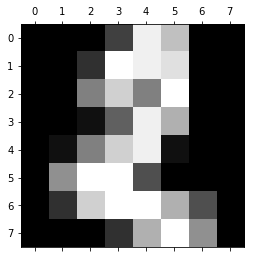

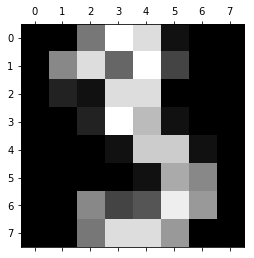

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])
        

In [7]:
# creating a DF 

df = pd.DataFrame(digits.data)
df.head()                        # each sample is an array of 64 integers

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df['target']=digits.target         # adding new column target
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
from sklearn.model_selection import train_test_split

x = df.drop(['target'],axis='columns')
y = digits.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [10]:
len(x_test)

360

In [11]:
from sklearn.ensemble import RandomForestClassifier          # ensemble- used when using multiple algorithms to predict outcome

model = RandomForestClassifier(n_estimators=20)   # 10 means no. of tree used     (or increase it )
model.fit(x_train,y_train)                           # use these parameters to improve performance of model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
model.score(x_test,y_test)

0.9611111111111111

In [13]:
# using confusion matrix : to see distribution of errors and where my model perform well vs poor

y_predicted = model.predict(x_test)     

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,y_predicted)       # y_test : is truth , y_predicted : is a prediction
acc = accuracy_score(y_test, y_predicted)
print(cm, acc)

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 1  0 26  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  0]
 [ 0  1  0  0 44  0  0  0  0  0]
 [ 0  0  0  0  1 36  0  0  0  1]
 [ 1  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  1]
 [ 0  1  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  1  1  0  1  1 33]] 0.9611111111111111


Text(69.0, 0.5, 'Truth')

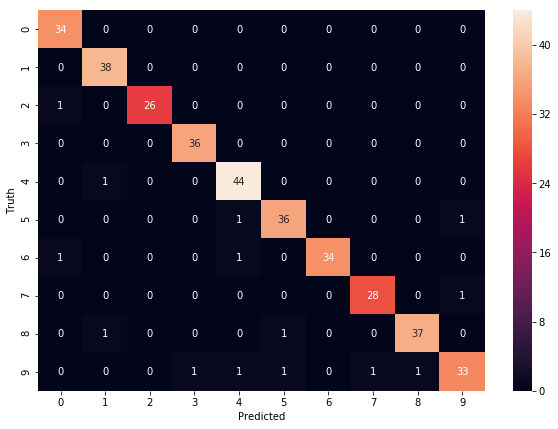

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')